### Encontrando conectores chave

In [4]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [5]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [6]:
# Inicialize o dict com uma lista vazia para cada id de usuário:
friendships = {user["id"]: [] for user in users}

In [7]:
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [8]:
# Em seguida, execute um loop pelos pares de amigos para preenchê-la:
for i, j in friendship_pairs:
    friendships[i].append(j) # adicione j como amigo do usuario i
    friendships[j].append(i) # adicione i como amigo do usuario j

In [9]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

Agora que colocamos as amizades em um dict, podemos facilmente fazer perguntas como "Qual é o número médio de conexões?"

Primeiro, determinamos o número _total_ de conexões somando os tamanhos de todas as listas de `friends`:

In [12]:
def number_of_friends(user):
    """Quantos amigos tem o _user_?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [14]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

Em seguida, basta dividir pelo número de usuários:

In [16]:
num_users = len(users)
avg_connections = total_connections/num_users
avg_connections

2.4

Também é fácil encontrar as pessoas mais conectadas - as que possuem o maior número de amigos. Colocamos em ordem decrescente, dos que têm mais amigos para os que tem menos amigos:

In [17]:
# Crie uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

In [18]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [19]:
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)

In [20]:
#cada par [e (user_id, num_friends)]
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

### Cientistas de dados que você talvez conheça

É pedido que você desenvolvaum sugestor do tipo "Cientistas de Dados que Você Talvez Conheça". A primeira ideia é sugerir que os usuários podem conhecer os amigos dos seus amigos e coletar os amigos dos amigos:

In [21]:
def foaf_ids_bad(user):
    """friend of a friend"""
    return [foaf_id 
               for friend_id in friendships[user["id"]]
                   for foaf_id in friendships[friend_id]]

In [22]:
users[0]

{'id': 0, 'name': 'Hero'}

In [28]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

O amigo "1" de Hero (Dunn) tem amizades com o próprio Hero ("0"), com a "2" (Sue) e com a "3" (Chi)

O amigo "2" de Hero (Sue) tem amizades com o pŕoprio Hero ("0"), com o "1" (Dunn) e com a "3" (Chi)

In [29]:
for friend_id in friendships[users[0]["id"]]:
    for foaf_id in friendships[friend_id]:
        print(friend_id, foaf_id)

1 0
1 2
1 3
2 0
2 1
2 3


De maneira mais clara, agora, as amizades do "0" (Dunn), e dos seus amigos "1" e "2":

In [38]:
print(friendships[0])
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


Como essas informações sobre quem é amigo de quem parecem ser interessantes, vamos gerar uma contagem de amigos em comum, porém excluindo as pessoas que o usuário já conhece:

In [39]:
from collections import Counter

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]                              #para cada amigo meu, encontre os amigos deles
            for foaf_id in friendships[friend_id]                          #que não sejam eu e que não sejam meus amigos.
            if foaf_id != user_id and foaf_id not in friendships[user_id]
    
    )

In [40]:
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


isso quer dizer que o usuário 3 (Chi) tem dois amigos em comum com o "0" (Hero) e 1 amigo em comum com o "5" (Clive)

Como cientista de dados, talvez você queira encontrar usuários com interesses similares. (Esse é um bom exemplo do fator "experiência substancial" do data science). Então, depois de suar um pouco a camisa, você obtém os seguintes dados, reunidos como uma lista de pares `(user_id, interest)`:

In [38]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"), 
    (4, "machine learning"), (4, "regression"), (4, "decision trees"), 
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"), 
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"), 
    (6, "probability"), (6, "mathematics"), (6, "theory"), 
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"), 
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"), 
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"), 
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

Por exemplo, Hero (id 0) não possui amigos em comum com Klein (id 9), mas os dois se interessam por Java e Big Data. É fácil construir uma função para encontrar usuários com o mesmo interesse:

In [42]:
def data_scientists_who_like(target_interest):
    """Find users id that share same interest."""
    return [user_id
               for user_id, user_interest in interests
               if user_interest == target_interest]

In [43]:
data_scientists_who_like("R")

[3, 5]

A operação funciona, porém tem que examinar a lista de interesses inteira a cada busca. Quando há muitos usuários e interesses (ou para fazer muitas buscas), é melhor construir um índice de interesses para usuários:

In [58]:
from collections import defaultdict

# The keys are the interests, the values are lists of user_ids within the specific interest
user_ids_by_interest = defaultdict(list)

In [59]:
user_ids_by_interest

defaultdict(list, {})

In [60]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [61]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': [

E outro índice, de usuários para interesses:

In [52]:
# The keys are user_ids, the values are lists of interests from the known user_id.
interests_by_user_id = defaultdict(list)

In [53]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [54]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
        

Agora é possível determinar quem tem mais interesses em comum com um usuário específico:
- Faça uma iteração dos interesses do usuário;
- Para cada interesse, faça a iteração dos outros usuários com o mesmo interesse;
- Conte quantas vezes cada usuário aparece.

In [62]:
def most_commom_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
            for interested_user_id in user_ids_by_interest[interest]
            if interested_user_id != user["id"])

In [63]:
most_commom_interests_with(users[3])

Counter({5: 2, 2: 1, 6: 2, 4: 1})

### Salários e Experiência

In [20]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                         (48000, 0.7), (76000, 6), 
                         (69000, 6.5), (76000, 7.5), 
                         (60000, 2.5), (83000, 10), 
                         (48000, 1.9), (63000, 4.2)]

In [23]:
salaries = [sal[0] for sal in salaries_and_tenures]
tenures = [ter[1] for ter in salaries_and_tenures]

In [24]:
salaries.sort()
tenures.sort()

In [12]:
from matplotlib import pyplot as plt

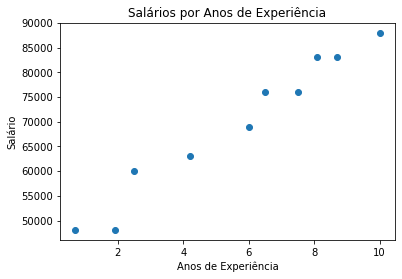

In [25]:
plt.scatter(tenures, salaries)
plt.title("Salários por Anos de Experiência")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.show()

Certamente, os mais experientes tendem a ganhar melhor, entretanto como isso pode se tornar um fato curioso? Primeiro, você analisa a média salarial por anos de experiência.

In [26]:
# The keys are the years, the values are lists of salaries by tenure.
from collections import defaultdict
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# The keys are years, each value is the mean salary associated with the tenure.
average_salary_by_tenure = {
    tenure: sum(salaries)/len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [27]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [28]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

não serviu pra muita coisa, já que os usuários não têm os mesmos anos de experiência. Talvez seja melhor fazer buckets (intervalos de classe?) de experiências:

In [29]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

Em seguida, agrupamos os salários correspondentes a cada bucket (intervalo de classe?):

In [30]:
# The keys are tenure buckets, the values are lists of salaries associated with his respective bucket.
salary_by_tenure_bucket = defaultdict(list)

In [31]:
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

Dando uma olhada em como ficou a distribuição:

In [32]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

E, finalmente, computamos a média salarial de cada grupo:

In [33]:
# The keys are the tenure buckets, the values are the mean salarie of the bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries)/len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [34]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

Temos uma boa sacada: "Os cientistas de dados com mais de cinco anos de experiência ganham 65% mais do que os colegas com pouca ou nenhuma experiência!"

No entanto, escolhemos os buckets de forma bem arbitrária. O objetivo, na verdade, é indicar o efeito salarial - em média - de cada nao de experiência. Além de deixar o fato mais curioso, podemos _fazer previsões_ sobre salários que não conhecemos a partir dessa informação. Cap 14 explorará mais

### Contas Pagas

Com as infos passadas é possível perceber uma relação aparente entre os anos de experiência e as contas pagas:

`0.7 paid`

`1.9 unpaid`

`2.5 paid`

`4.2 unpaid`

`6.0 unpaid`

`6.5 unpaid`

`7.5 unpaid`

`8.1 unpaid`

`8.7 paid`

`10.0 paid`

Os usuários com pouquíssimos e muitos anos de experiência tendem a pagar, enquanto os com experiência mediana, não. Logo, para criar um modelo - mesmo com dados insuficientes para isso -, você deveria prever "paid" para os usuários com pouquíssimos, e muitos, anos de experiência e "unpaid" para os usuários com experiência mediana:

In [35]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

No cap 16 investigaremos melhor problemas desse tipo. O caso foi feito no olhômetro mesmo.

### Tópicos de Interesse

Foram solicitados dados sobre os tópicos que mais interessam aos usuários.

In [39]:
from collections import Counter
words_and_counts = Counter(word
                            for user, interest in interests
                              for word in interest.lower().split())

In [40]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
